In [2]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [3]:
cols = [col for col in quant.columns if "Intensity" in col]

In [4]:
quantnorm = OA.quantile_transform(quant, cols)

# Biased

In [5]:
SI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [6]:
TSI = SI.set_index("Modifications").T

In [7]:
TSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [8]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [9]:
traits

,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_02_gis,0.7,46.7,23.6,1,1
1,ag_03_0247,1.0,55.0,16.0,1,2
2,ag_04_0210,0.0,44.0,27.0,1,3
3,ag_05_0306,0.0,52.0,36.0,1,4
4,ag_06_0120,0.0,42.0,42.0,1,5
...,...,...,...,...,...,...
88,ag_99_0193,1.0,50.0,11.0,3,89
89,ag_100_0081,1.0,62.0,14.0,3,90
90,ag_101_0479,1.0,44.0,13.0,3,91
91,ag_102_0463,1.0,49.0,16.0,3,92


In [10]:
TSI.reset_index(inplace=True)

In [11]:
TSI["index"] = TSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [12]:
data = pd.merge(TSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [13]:
data2 = data.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1918]Carbonyl[S]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[360]Pro->Pyrrolidinone[P]", "[368]Cys->Dha[C]", "[936]Chlorination[Y]", "Age", "Sex", "Batch"], axis=1).reset_index()

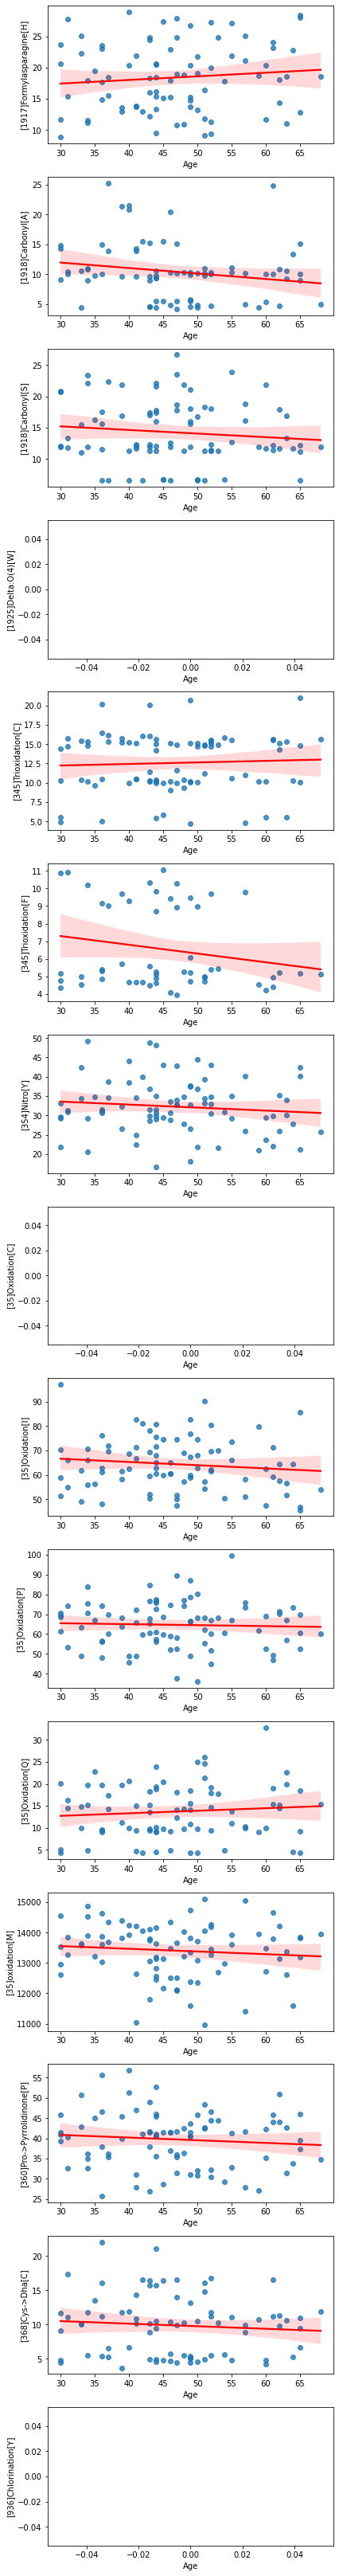

In [14]:
import numpy as np
from scipy import stats
# Define the columns to plot
data2 = data2.replace(0, np.nan)
columns_to_plot = data2.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data2['Age'],data2[col])
    sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

In [15]:
forPCA = data.reset_index()

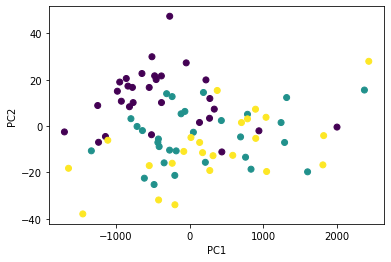

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = forPCA.drop(["SampleID", "Sex", "Age", "PMI", "Batch", "RunOrder"], axis=1)
y = forPCA["Batch"]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()

# Unbiased

In [42]:
quantnorm.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_ag_102_0463,Intensity_ag_81_0459,Intensity_ag_05_0306,Intensity_ag_62_0494,Intensity_ag_51_0141,...,Intensity_ag_92_0297,Intensity_ag_40_0262,Intensity_ag_100_0081,Intensity_ag_21_0436,Intensity_ag_68_0274,Intensity_ag_67_0255,Intensity_ag_30_0231,Intensity_ag_44_0439,Intensity_ag_15_0285,Modifications
0,AAAAAAAAAAAAAAAAGATCLER20|[402]Cys->Oxoalanine[C],AAAAAAAAAAAAAAAAGATCLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[402]Cys->Oxoalanine[C]
1,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,5.498552,5.083966,5.125888,4.914839,4.897233,...,5.171721,5.290591,4.766093,5.315471,5.199444,4.606874,4.888838,5.332416,5.043433,None
2,AAAAAAAAAAAPPAPPEGASPGDSARnan,AAAAAAAAAAAPPAPPEGASPGDSAR,CSKI1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.852665,NaN,NaN,4.449425,NaN,NaN,None
3,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,5.862463,5.822998,6.315570,6.361520,6.184195,...,6.204231,6.016796,6.220111,6.005364,6.218672,6.162266,6.090834,6.082665,6.029343,None
4,AAAAAAARGSNSDSPPGRPAPAASPEHRnan,AAAAAAARGSNSDSPPGRPAPAASPEHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [43]:
quantnormex = quantnorm.explode("Modifications")

In [44]:
g = quantnormex.groupby("Modifications").sum().drop(["Gene Names", "Organism"], axis=1)

In [45]:
g.replace(0, np.nan, inplace=True)

In [46]:
g.dropna(thresh=g.shape[1]*0.75, axis=0, inplace=True)

In [47]:
unbiased = g.T

In [54]:
unbiased = unbiased.reset_index()

In [56]:
unbiased["index"] = unbiased["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [57]:
unbiased

Modifications,index,Ala->Gly[A],Gly->Ala[G],Gly->Arg[G],Gly->Asn[G],Gly->Asp[G],Gly->Cys[G],Gly->Gln[G],Gly->Glu[G],Gly->His[G],...,[999976]Dimethyl_2H(6)[N-TERM],[999978]Dimethyl_2H(6)[R],[99997]ICPL_13C(6)2H(4)[N-TERM],[999981]Dimethyl_2H(6)13C(2)[R],[99998]ICPL_2H(4)[K],[999990]GIST-Quat[N-TERM],[999992]GIST-Quat_2H(3)[N-TERM],[999993]GIST-Quat_2H(3)[K],[999998]Galactosyl[N-TERM],semi_tryptic
0,ag_102_0463,74.341546,21.068194,8.542634,41.894366,40.974074,17.983509,19.599887,34.562543,17.402105,...,5.818232,7.707033,14.819435,NaN,3.619632,8.777822,5.395939,4.638700,4.093404,220.620086
1,ag_81_0459,79.281247,10.626454,13.182993,33.915080,43.323146,12.520082,25.558767,40.350993,17.829824,...,5.492019,8.788390,4.321205,4.068923,7.882531,14.221328,4.721316,5.033528,3.876688,289.923230
2,ag_05_0306,62.974592,14.780450,9.547067,26.634060,48.170328,13.599739,20.122673,61.740339,23.323110,...,4.962189,4.422557,13.129189,3.762774,12.301365,NaN,NaN,4.554233,4.491678,239.113726
3,ag_62_0494,78.724524,25.614519,4.195494,41.512781,49.384763,14.387005,24.321932,44.703284,21.395771,...,7.741079,9.578912,20.472170,4.035714,13.640692,8.096059,5.053641,8.307711,3.852067,226.536589
4,ag_51_0141,84.189412,20.461282,4.444589,32.677485,64.325474,14.267559,19.373749,60.902739,16.978668,...,5.317083,3.844555,14.316958,4.071353,12.997856,13.564573,9.985542,5.558743,4.493213,244.522412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ag_68_0274,86.619340,21.296315,8.480808,34.754508,50.731246,14.177186,25.725060,43.412191,22.331983,...,5.892295,4.210845,4.331280,NaN,3.713001,16.534382,4.891762,NaN,4.205178,223.830958
80,ag_67_0255,81.124568,20.914179,3.655780,32.538253,45.258527,8.906635,25.239207,46.190306,21.921742,...,5.561975,4.313948,8.685146,3.615865,20.080794,30.734135,11.388473,9.399041,3.868611,214.785976
81,ag_30_0231,98.599120,14.997552,8.222970,19.454069,62.427253,22.956337,25.299860,52.439676,22.050944,...,4.417799,4.514306,13.523293,4.173280,14.948403,5.440307,NaN,13.138394,4.441746,271.814095
82,ag_44_0439,80.674383,25.715089,9.231133,38.371732,67.818085,19.891837,20.117843,42.700650,23.436425,...,4.964234,4.068878,20.599870,3.663133,19.540551,3.793015,4.296251,10.292229,4.162208,272.703382


In [58]:
unbiased = pd.merge(unbiased, traits, left_on="index", right_on="SampleID")

In [60]:
unbiased

,index,Ala->Gly[A],Gly->Ala[G],Gly->Arg[G],Gly->Asn[G],Gly->Asp[G],Gly->Cys[G],Gly->Gln[G],Gly->Glu[G],Gly->His[G],...,[999992]GIST-Quat_2H(3)[N-TERM],[999993]GIST-Quat_2H(3)[K],[999998]Galactosyl[N-TERM],semi_tryptic,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_102_0463,74.341546,21.068194,8.542634,41.894366,40.974074,17.983509,19.599887,34.562543,17.402105,...,5.395939,4.638700,4.093404,220.620086,ag_102_0463,1.0,49.0,16.0,3,92
1,ag_81_0459,79.281247,10.626454,13.182993,33.915080,43.323146,12.520082,25.558767,40.350993,17.829824,...,4.721316,5.033528,3.876688,289.923230,ag_81_0459,1.0,55.0,33.0,3,72
2,ag_05_0306,62.974592,14.780450,9.547067,26.634060,48.170328,13.599739,20.122673,61.740339,23.323110,...,NaN,4.554233,4.491678,239.113726,ag_05_0306,0.0,52.0,36.0,1,4
3,ag_62_0494,78.724524,25.614519,4.195494,41.512781,49.384763,14.387005,24.321932,44.703284,21.395771,...,5.053641,8.307711,3.852067,226.536589,ag_62_0494,1.0,51.0,41.0,2,57
4,ag_51_0141,84.189412,20.461282,4.444589,32.677485,64.325474,14.267559,19.373749,60.902739,16.978668,...,9.985542,5.558743,4.493213,244.522412,ag_51_0141,1.0,65.0,17.0,2,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ag_68_0274,86.619340,21.296315,8.480808,34.754508,50.731246,14.177186,25.725060,43.412191,22.331983,...,4.891762,NaN,4.205178,223.830958,ag_68_0274,1.0,48.0,24.0,2,63
80,ag_67_0255,81.124568,20.914179,3.655780,32.538253,45.258527,8.906635,25.239207,46.190306,21.921742,...,11.388473,9.399041,3.868611,214.785976,ag_67_0255,0.0,45.0,29.0,2,62
81,ag_30_0231,98.599120,14.997552,8.222970,19.454069,62.427253,22.956337,25.299860,52.439676,22.050944,...,NaN,13.138394,4.441746,271.814095,ag_30_0231,1.0,40.0,16.0,1,28
82,ag_44_0439,80.674383,25.715089,9.231133,38.371732,67.818085,19.891837,20.117843,42.700650,23.436425,...,4.296251,10.292229,4.162208,272.703382,ag_44_0439,0.0,41.0,23.6,2,40


In [66]:
import numpy as np
from scipy import stats
# Define the columns to plot
columns_to_plot = unbiased.columns[1:-7]

# Create the plot
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
diction = {"Mod": [], "R2": [], "p": []}
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(unbiased['Age'],unbiased[col])
    # print("{}: R^2 = {}, p = {}".format(col, r_value**2, p_value))
    diction["Mod"].append(col)
    diction["R2"].append(r_value**2)
    diction["p"].append(p_value)

data = pd.DataFrame.from_dict(diction)

    # sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    # axes[i].set_xlabel('Age')
    # axes[i].set_ylabel(col)
    
    # handles, labels = axes[i].get_legend_handles_labels()
    # if len(handles) > 1:
    #     axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
# fig.tight_layout(pad=1.0)
# # fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# # Show the plot
# plt.show()

In [69]:
data.sort_values("R2", ascending=False)

,Mod,R2,p
34,[115]OxProBiotin[P],0.094463,0.004457
397,[901]4AcAllylGal[C],0.066821,0.017588
26,[1017]DMPO[Y],0.064817,0.019436
384,[7]Deamidated[Q],0.058939,0.026074
389,[822]Gly-loss+Amide[G],0.056017,0.030190
...,...,...,...
485,[99998]ICPL_2H(4)[K],NaN,NaN
486,[999990]GIST-Quat[N-TERM],NaN,NaN
487,[999992]GIST-Quat_2H(3)[N-TERM],NaN,NaN
488,[999993]GIST-Quat_2H(3)[K],NaN,NaN


# With further normalization

In [3]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [4]:
cols = [col for col in quant.columns if "Intensity" in col]

In [5]:
quantnorm = OA.quantile_transform(quant, cols)
quantnorm[cols] = quantnorm[cols].transform(lambda x: x/x.sum())

In [6]:
NSI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [7]:
NTSI = NSI.set_index("Modifications").T

In [8]:
NTSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [9]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [10]:
NTSI.reset_index(inplace=True)

In [11]:
NTSI["index"] = NTSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [13]:
ndata = pd.merge(NTSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [15]:
ndata2 = ndata.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1918]Carbonyl[S]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[360]Pro->Pyrrolidinone[P]", "[368]Cys->Dha[C]", "[936]Chlorination[Y]", "Age", "Sex", "Batch"], axis=1).reset_index()

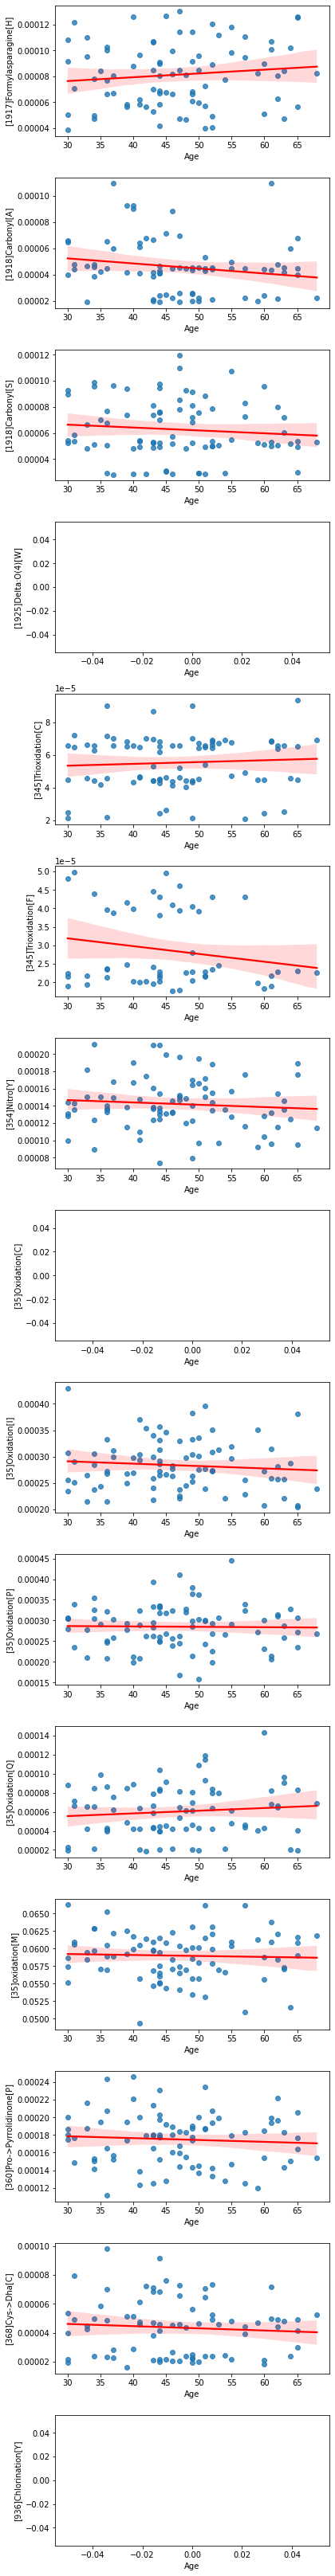

In [17]:
import numpy as np
from scipy import stats
# Define the columns to plot
ndata2 = ndata2.replace(0, np.nan)
columns_to_plot = ndata2.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(ndata2['Age'],ndata2[col])
    sns.regplot(x='Age', y=col, data=ndata2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

# More normalization - unbiased

In [20]:
quantnormex = quantnorm.explode("Modifications")

In [21]:
g = quantnormex.groupby("Modifications").sum().drop(["Gene Names", "Organism"], axis=1)

In [22]:
g.replace(0, np.nan, inplace=True)

In [23]:
g.dropna(thresh=g.shape[1]*0.75, axis=0, inplace=True)

In [24]:
nunbiased = g.T

In [25]:
nunbiased = nunbiased.reset_index()

In [26]:
nunbiased["index"] = nunbiased["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [27]:
nunbiased = pd.merge(nunbiased, traits, left_on="index", right_on="SampleID")

In [29]:
import numpy as np
from scipy import stats
# Define the columns to plot
columns_to_plot = nunbiased.columns[1:-7]

# Create the plot
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
diction = {"Mod": [], "R2": [], "p": []}
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(nunbiased['Age'],nunbiased[col])
    # print("{}: R^2 = {}, p = {}".format(col, r_value**2, p_value))
    diction["Mod"].append(col)
    diction["R2"].append(r_value**2)
    diction["p"].append(p_value)

data = pd.DataFrame.from_dict(diction)

    # sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    # axes[i].set_xlabel('Age')
    # axes[i].set_ylabel(col)
    
    # handles, labels = axes[i].get_legend_handles_labels()
    # if len(handles) > 1:
    #     axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
# fig.tight_layout(pad=1.0)
# # fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# # Show the plot
# plt.show()

In [30]:
data.sort_values("R2", ascending=False)

,Mod,R2,p
34,[115]OxProBiotin[P],0.103711,0.002814
397,[901]4AcAllylGal[C],0.091681,0.005117
26,[1017]DMPO[Y],0.057708,0.027732
385,[7]Deamidated[R],0.050333,0.040206
175,[21]Phospho[S],0.049388,0.042176
...,...,...,...
485,[99998]ICPL_2H(4)[K],NaN,NaN
486,[999990]GIST-Quat[N-TERM],NaN,NaN
487,[999992]GIST-Quat_2H(3)[N-TERM],NaN,NaN
488,[999993]GIST-Quat_2H(3)[K],NaN,NaN
